In [ ]:
# default_exp geopandas

# Spatial analysis with geopandas

> geopandas

In [ ]:
import geopandas as gpd

### Indexing and Selecting Data

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [ ]:
type(world), world.shape

(geopandas.geodataframe.GeoDataFrame, (177, 6))

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world.continent.value_counts()

Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Antarctica                  1
Seven seas (open ocean)     1
Name: continent, dtype: int64

In [ ]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
southern_world = world.cx[:, :0]

<AxesSubplot:>

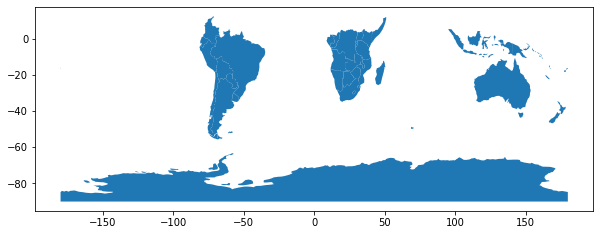

In [ ]:
southern_world.plot(figsize=(10,6))

In [ ]:
southern_world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Mapping

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [ ]:
cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))

In [ ]:
# Check data
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

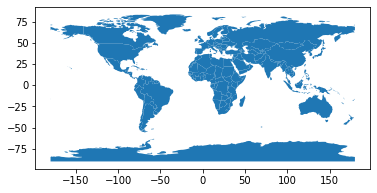

In [ ]:
world.plot()

In [ ]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


<AxesSubplot:>

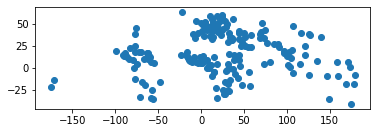

In [ ]:
cities.plot()

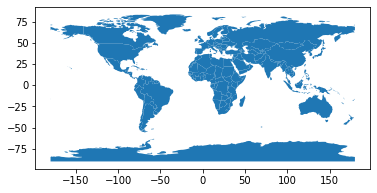

In [ ]:
ax = world.plot()

In [ ]:
cities.plot(ax=ax)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

### Choropleth Maps

In [ ]:
# Plot by GDP per capta
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [ ]:
world.shape

(176, 6)

In [ ]:
world['gdp_per_cap'] = world.gdp_md_est/world.pop_est

<AxesSubplot:>

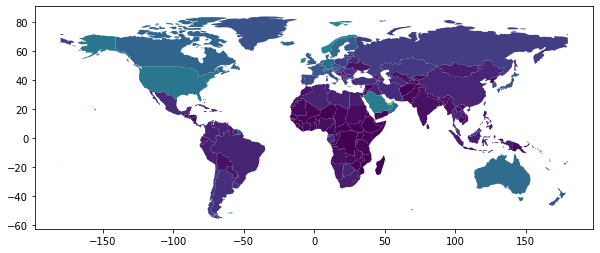

In [ ]:
world.plot(column="gdp_per_cap", figsize=(10,6))

### Creating a legend

<AxesSubplot:>

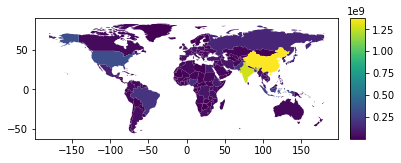

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='pop_est', ax=ax, legend=True, cax=cax, figsize=(10,6))

<AxesSubplot:>

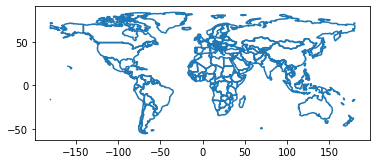

In [ ]:
# Plot boundary
world.boundary.plot()

### Maps with Layers

<AxesSubplot:>

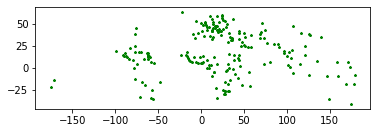

In [ ]:
# Look at capitals
cities.plot(marker="*", color="green", markersize=5)

In [ ]:
# Check crs
cities.crs, world.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [ ]:
# Convert into one CRS
cities = cities.to_crs(world.crs)

##### Plot layers: option 1

<AxesSubplot:>

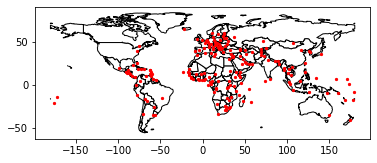

In [ ]:
base = world.plot(color="white", edgecolor="black")
cities.plot(ax=base, marker="o", color="red", markersize=5)

##### Plot layers: option 2

In [ ]:
import matplotlib.pyplot as plt

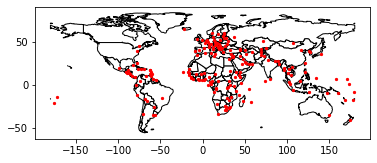

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
world.plot(ax=ax, color="white", edgecolor="black")
cities.plot(ax=ax, marker="o", color="red", markersize=5)
plt.show()